# 支持向量机
在本练习中，我们将使用高斯核函数的支持向量机（SVM）来构建垃圾邮件分类器。

[sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[cmap color](https://matplotlib.org/examples/color/colormaps_reference.html)

## 数据集

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
path = '数据集/ex6data1.mat'
raw_data = loadmat(path)

In [3]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

In [4]:
data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


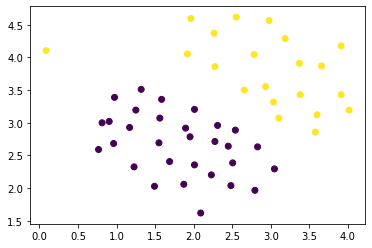

In [5]:
# 绘制图像
plt.scatter(data.X1, data.X2, c=data.y)
plt.show()

In [6]:
# 用plot库绘制
def plot_init_pic(data, fig, ax):
    positive = data.loc[data['y']==1]
    negative = data.loc[data['y']==0]
    
    ax.scatter(positive['X1'], positive['X2'], s=50, marker='+', label='Positive')
    ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')

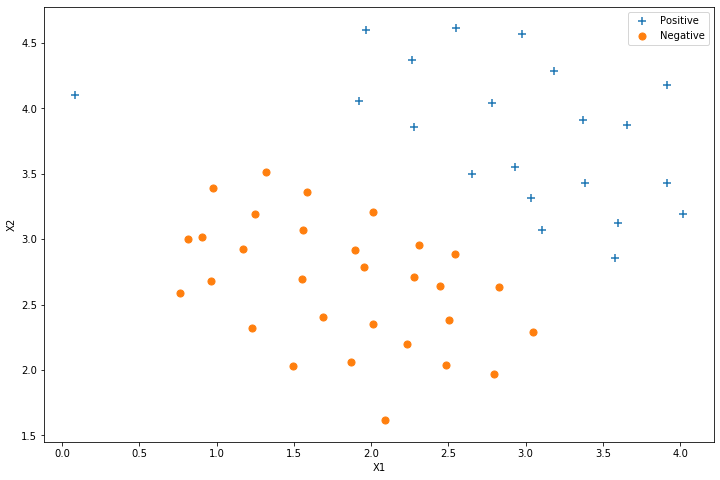

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_init_pic(data, fig, ax)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
plt.show()

请注意，还有一个异常的正例在其他样本之外。  
这些类仍然是线性分离的，但它非常紧凑。 我们要训练线性支持向量机来学习类边界。

## try C = 1

In [8]:
from sklearn import svm

# 配置LinearSVC参数
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=20000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=20000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [9]:
# 将之前配置好的模型应用到数据集上
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

### 找出决策边界再绘制

In [10]:
# 法一： 组建网格然后将网格点带入决策边界函数，找出值近似为0的点就是边界点
def find_decision_boundary(svc, x1min, x1max, x2min, x2max, diff):
    x1 = np.linspace(x1min, x1max, 1000)
    x2 = np.linspace(x2min, x2max, 1000)
    
    coordinates = [(x, y) for x in x1 for y in x2]
    x_cord, y_cord = zip(*coordinates)
    c_val = pd.DataFrame({'x1':x_cord, 'x2':y_cord})
    c_val['val'] = svc.decision_function(c_val[['x1', 'x2']])
    
    decision = c_val[np.abs(c_val['val']) < diff]
    
    return decision.x1, decision.x2

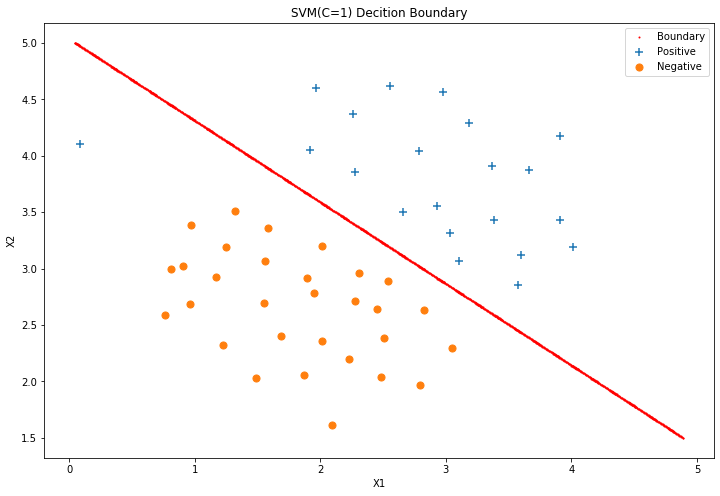

In [11]:
x1, x2 = find_decision_boundary(svc, 0, 5, 1.5, 5, 2 * 10**-3)

# fig. ax = plt.subplots(figsize=(12, 8))  逗号写成了点，jupyter发现不了
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x1, x2, s=1, c='r', label='Boundary')

plot_init_pic(data, fig, ax)

ax.set_title('SVM(C=1) Decition Boundary')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()

plt.show()

In [12]:
# The confidence score for a sample is the signed distance of that sample to the hyperplane.
data['SVM1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

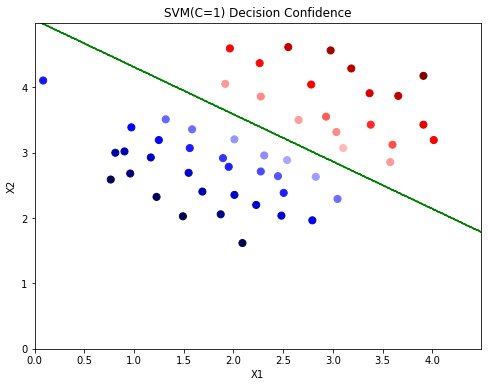

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='seismic')
ax.set_title('SVM(C=1) Decision Confidence')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# 法二：决策边界, 使用等高线表示
x1 = np.arange(0, 4.5, 0.01)
x2 = np.arange(0, 5, 0.01)
x1, x2 = np.meshgrid(x1, x2)
y_pred = np.array([svc.predict(np.vstack((a, b)).T) for (a, b) in zip(x1, x2)])
plt.contour(x1, x2, y_pred, colors='g', linewidths=1)

plt.show()

## try C = 400
C对应正则化的$\lambda$，$C = \frac{1}{\lambda}$，C越大越容易过拟合。图像中最左侧的点被划分到右侧。

In [14]:
svc1 = svm.LinearSVC(C=400, loss='hinge', max_iter=20000)
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y'])

C:\Users\humin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.0

### 决策边界

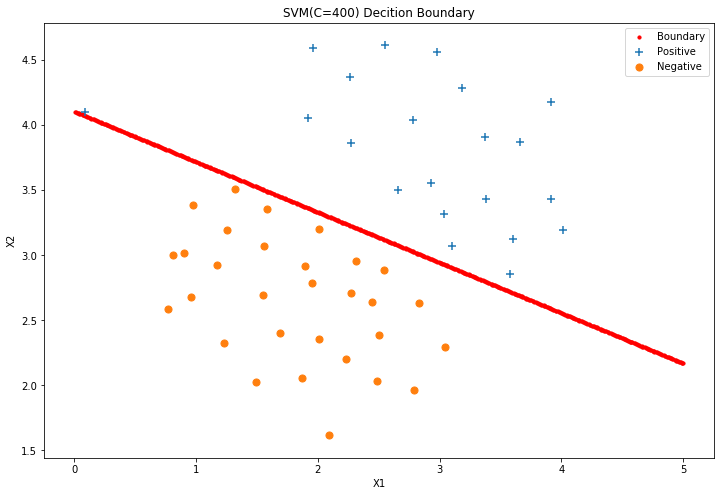

In [15]:
x1, x2 = find_decision_boundary(svc1, 0, 5, 1.5, 5, 8 * 10**-3)  # 这里调整了diff这个阈值，否则决策点连不成一条连续的线

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x1, x2, s=10, c='r', label='Boundary')

plot_init_pic(data, fig, ax)

ax.set_title('SVM(C=400) Decition Boundary')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()

plt.show()

In [16]:
# The confidence score for a sample is the signed distance of that sample to the hyperplane.
data['SVM400 Confidence'] = svc1.decision_function(data[['X1', 'X2']])

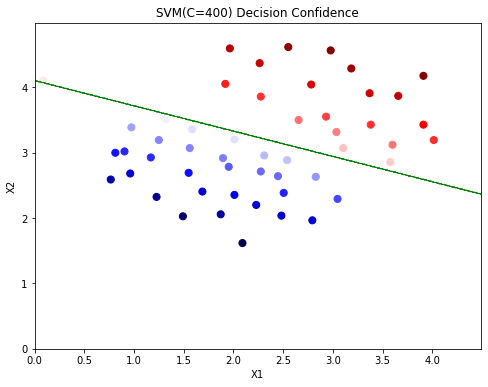

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM400 Confidence'], cmap='seismic')
ax.set_title('SVM(C=400) Decision Confidence')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# 决策边界, 使用等高线表示
x1 = np.arange(0, 4.5, 0.01)
x2 = np.arange(0, 5, 0.01)
x1, x2 = np.meshgrid(x1, x2)
y_pred = np.array([svc1.predict(np.vstack((a, b)).T) for (a, b) in zip(x1, x2)])
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

# 高斯核函数 SVM with Gaussian Kernels
![](https://img.arctee.cn/202121242137-f.png)

In [18]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-np.power(x1-x2, 2).sum() / (2 * sigma**2))

In [19]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

## 数据集2
接下来，在另一个数据集上使用高斯内核，找非线性边界。

In [20]:
raw_data = loadmat('数据集/ex6data2.mat')
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

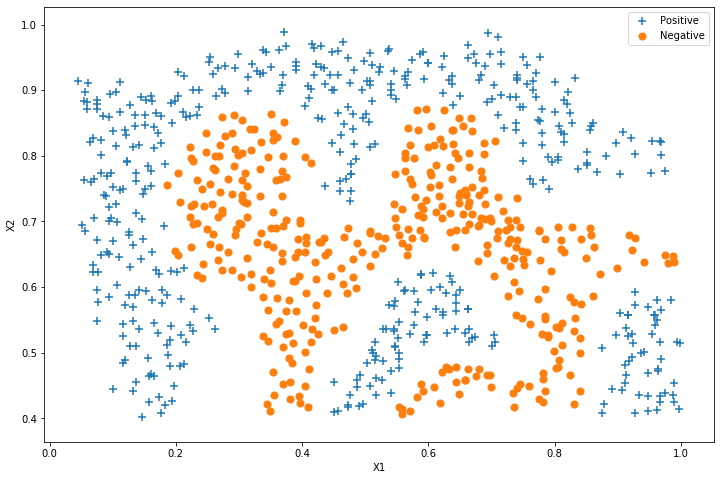

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_init_pic(data, fig, ax)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
plt.show()

In [22]:
svc2 = svm.SVC(C=100, gamma=10, probability=True)
svc2

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [23]:
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

## 直接绘制决策边界

In [24]:
# 法二：利用等高线绘制决策边界
def plot_decision_boundary(svc, x1min, x1max, x2min, x2max, ax):
#     x1 = np.arange(x1min, x1max, 0.001)
#     x2 = np.arange(x2min, x2max, 0.001)
    x1 = np.linspace(x1min, x1max, 1000)
    x2 = np.linspace(x2min, x2max, 1000)
    
    x1, x2 = np.meshgrid(x1, x2)
    y_pred = np.array([svc.predict(np.vstack((a, b)).T) for (a, b) in zip(x1, x2)])
        
    ax.contour(x1, x2, y_pred, colors='r', linewidths=5)

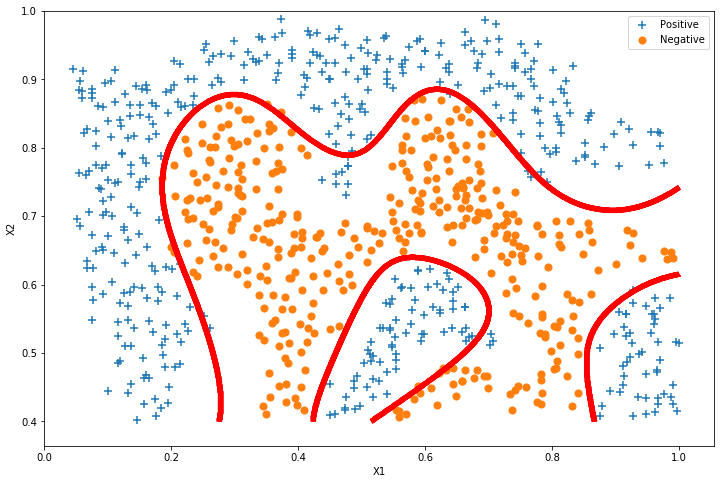

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))

plot_init_pic(data, fig, ax)
plot_decision_boundary(svc2, 0, 1, 0.4, 1, ax)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
plt.show()

# 10秒

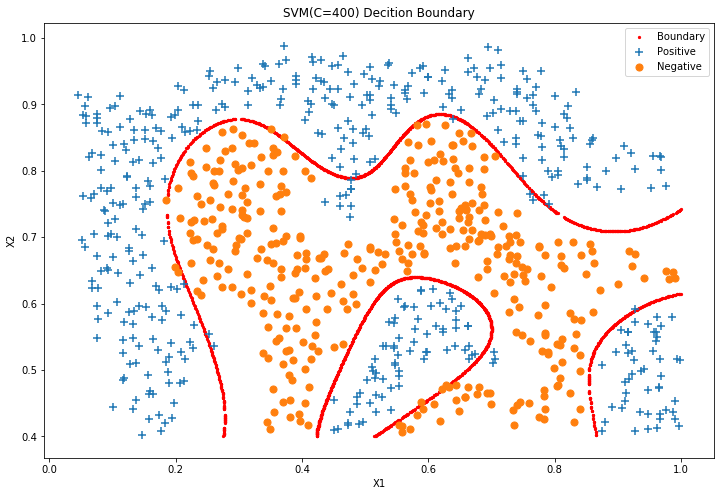

In [26]:
# 法一 要15秒
x1, x2 = find_decision_boundary(svc2, 0, 1, 0.4, 1, 0.01)  # 这里调整了diff这个阈值，否则决策点连不成一条连续的线

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x1, x2, s=5, c='r', label='Boundary')

plot_init_pic(data, fig, ax)

ax.set_title('SVM(C=400) Decition Boundary')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()

plt.show()

##  数据集3
对于第三个数据集，我们给出了训练和验证集，并且基于验证集性能为SVM模型找到最优超参数。  
我们现在需要寻找最优和，候选数值为[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

In [27]:
raw_data = loadmat('数据集/ex6data3.mat')
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

Xval = raw_data['Xval']
yval = raw_data['yval']

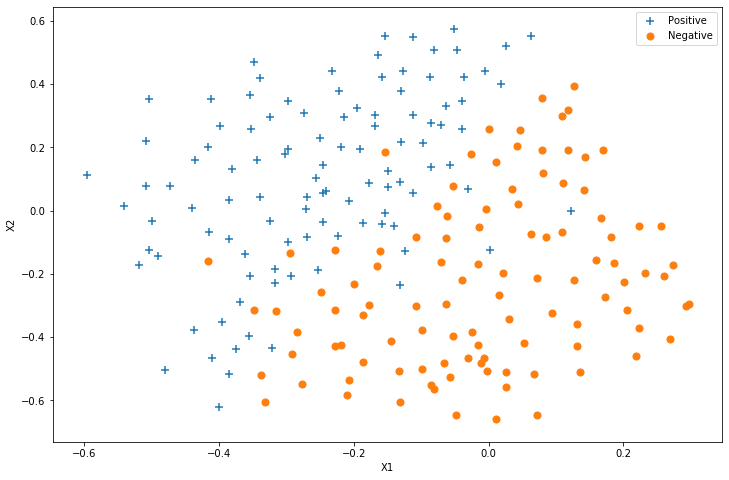

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_init_pic(data, fig, ax)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
plt.show()

### 找最优超参数

In [29]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C':None, 'gamma':None}
for c in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=c, gamma=gamma, probability=True)  
        svc.fit(data[['X1', 'X2']], data['y']) # 用训练集训练
        score =  svc.score(Xval, yval)  # 用验证集选优
        if score > best_score:
            best_score = score
            best_params['C'] = c
            best_params['gamma'] = gamma
best_score, best_params

(0.965, {'C': 0.3, 'gamma': 100})

## 绘制决策曲线

In [30]:
svc3 = svm.SVC(C=best_params['C'], gamma=best_params['gamma'], probability=True)
svc3

SVC(C=0.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [31]:
svc3.fit(data[['X1', 'X2']], data['y'])
svc3.score(data[['X1', 'X2']], data['y'])

0.95260663507109

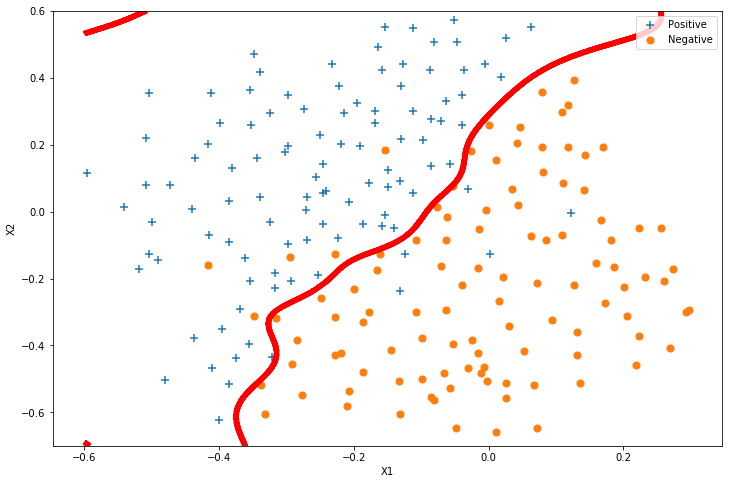

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))

plot_init_pic(data, fig, ax)
plot_decision_boundary(svc3, -0.6, 0.3, -0.7, 0.6, ax)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
plt.show()

# 垃圾邮件处理
在这一部分中，我们的目标是使用SVM来构建垃圾邮件过滤器。 
  
特征提取的思路：

首先对垃圾邮件进行预处理：

Lower-casing

Stripping HTML

Normalizing URLs

Normalizing Email Addresses

Normalizing Numbers

Normalizing Dollars

Word Stemming

Removal of non-words

然后统计所有的垃圾邮件中单词出现的频率，提取频率超过100次的单词，得到一个单词列表。

将每个单词替换为列表中对应的编号。

提取特征：每个邮件对应一个n维向量$R^n$，$x_i \in {0, 1}$，如果第i个单词出现，则$x_i=1$，否则$x_i=0$

本文偷懒直接使用已经处理好的特征和数据...

In [33]:
spam_train = loadmat('数据集/spamTrain.mat')
spam_test = loadmat('数据集/spamTest.mat')

spam_train
spam_train.keys(), spam_test.keys()   # 这个好，不用把所有数据打印出来就能直接看到数据的标签

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']),
 dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest']))

In [34]:
X = spam_train['X']
Xtest = spam_test['Xtest']

y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

每个文档已经转换为一个向量，其中1,899个维对应于词汇表中的1,899个单词。 它们的值为二进制，表示文档中是否存在该单词。

In [35]:
svc4 = svm.SVC()
svc4.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
print('Training accuracy = {0}%'.format(np.round(svc4.score(X, y) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(svc4.score(Xtest, ytest) * 100, 2)))

Training accuracy = 99.32%
Test accuracy = 98.7%


## 找出垃圾邮件敏感单词

In [37]:
kw = np.eye(1899)  # 为每个单词生成一个向量，每一行代表一个单词
spam_val = pd.DataFrame({'idx':range(1899)})

print(kw[:3,:])

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [38]:
spam_val['isspam'] = svc4.decision_function(kw)

spam_val.head()

,idx,isspam
0,0,-0.093653
1,1,-0.083078
2,2,-0.109401
3,3,-0.119685
4,4,-0.165824


In [39]:
spam_val['isspam'].describe()  

count    1899.000000
mean       -0.110039
std         0.049094
min        -0.428396
25%        -0.131213
50%        -0.111985
75%        -0.091973
max         0.396286
Name: isspam, dtype: float64

In [40]:
decision = spam_val[spam_val['isspam'] > 0] # 提取出垃圾邮件敏感单词
decision

,idx,isspam
155,155,0.095529
173,173,0.066666
297,297,0.396286
351,351,0.023785
382,382,0.030317
476,476,0.042474
478,478,0.057344
529,529,0.060692
537,537,0.008558
680,680,0.109643


In [41]:
path = '数据集/vocab.txt'
voc = pd.read_csv(path, header=None, names=['idx', 'voc'], sep='\t')
voc.head()

,idx,voc
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about


In [42]:
spamvoc = voc.loc[decision['idx']]

spamvoc

,idx,voc
155,156,basenumb
173,174,below
297,298,click
351,352,contact
382,383,credit
476,477,dollar
478,479,dollarnumb
529,530,email
537,538,encod
680,681,free
